In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
import session_info
session_info.show()

# PART I: DATA PREPROCESSING:

In [62]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'C:/Users\Bruker/crack/project_group11/crack_detect2/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 4697 images belonging to 2 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Users/Bruker/crack/crack_detect2/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 742 images belonging to 2 classes.


In [24]:
training_set[2]

(array([[[[0.32941177, 0.4666667 , 0.6313726 ],
          [0.32941177, 0.4666667 , 0.6313726 ],
          [0.32941177, 0.4643737 , 0.63595855],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.32941177, 0.4666667 , 0.6313726 ],
          [0.32941177, 0.4666667 , 0.6313726 ],
          [0.32941177, 0.4643737 , 0.63595855],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.32941177, 0.4666667 , 0.6313726 ],
          [0.32941177, 0.4666667 , 0.6313726 ],
          [0.32941177, 0.4643737 , 0.63595855],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.24705884, 0.17254902, 0.14901961],
          [0.24705

# PART II: BUILDING CONVOLUTIONAL NEURAL NETWORKS:

<font color=red>
Step 1: Choosing Model Type

In [8]:
cnn = Sequential() #Choosing sequential model.

<font color=red>
Step 2: Adding The First Convolution Layer

In [9]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu",input_shape=[64,64,3])) #Adding convolution layer

<font color=red>
Step 3: Adding Pooling Layer:

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. It is used to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features

In [10]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

<font color=red>
Step 4: Adding The Second Convolution Layer

In [12]:
cnn.add(Conv2D(filters= 32, kernel_size=3, activation= "relu"))

<font color=red>
Step 5: Adding the Second Pooling Layer

In [13]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

<font color=red>
Step 6: Adding Flatten Layer:

In [14]:
cnn.add(Flatten())

<font color=red>
Step 7: Adding Artificial Neural Networks Layer for Full Connection

In [15]:
cnn.add(Dense(units=128,activation="relu"))

In [16]:
cnn.add(Dense(units=256,activation="relu"))

In [17]:
cnn.add(Dense(units=1,activation="sigmoid"))

<font color=red>
Step 8: Compiling the CNN

In [18]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
cnn.summary() #This is the summary of our model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3

<font color=red>
Step 8: Training the CNN

In [20]:
history= cnn.fit(x=training_set,validation_data=test_set,epochs=14)

Epoch 1/14
147/147 [==============================] - 1655s 11s/step - loss: 0.5069 - accuracy: 0.7762 - val_loss: 1.2007 - val_accuracy: 0.5013
Epoch 2/14
147/147 [==============================] - 5134s 35s/step - loss: 0.3944 - accuracy: 0.8465 - val_loss: 0.5963 - val_accuracy: 0.6456
Epoch 3/14
147/147 [==============================] - 1049s 7s/step - loss: 0.3522 - accuracy: 0.8629 - val_loss: 0.9022 - val_accuracy: 0.5728
Epoch 4/14
147/147 [==============================] - 1198s 8s/step - loss: 0.3155 - accuracy: 0.8727 - val_loss: 0.6871 - val_accuracy: 0.6402
Epoch 5/14
147/147 [==============================] - 972s 7s/step - loss: 0.2913 - accuracy: 0.8795 - val_loss: 0.6360 - val_accuracy: 0.6833
Epoch 6/14
147/147 [==============================] - 1072s 7s/step - loss: 0.2785 - accuracy: 0.8831 - val_loss: 0.7804 - val_accuracy: 0.5593
Epoch 7/14
147/147 [==============================] - 942s 6s/step - loss: 0.2679 - accuracy: 0.8895 - val_loss: 0.9123 - val_accuracy:

# PART III: EVALUATION OF THE MODEL and MAKING PREDICTIIONS

In [25]:
pd.DataFrame(cnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.506872,0.776240,1.200741,0.501348
1,0.394414,0.846498,0.596340,0.645553
2,0.352188,0.862891,0.902154,0.572776
3,0.315482,0.872685,0.687106,0.640162
4,0.291291,0.879498,0.635976,0.683288
5,0.278499,0.883117,0.780446,0.559299
6,0.267866,0.889504,0.912279,0.626685
7,0.257432,0.895039,0.688271,0.663073
8,0.235145,0.897594,0.596524,0.721024
9,0.222977,0.908239,0.556125,0.760108


<AxesSubplot:>

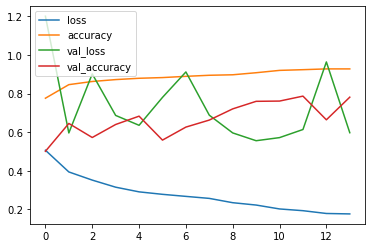

In [26]:
pd.DataFrame(cnn.history.history).plot()

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
def predictor(location):
    test_image=image.load_img(location,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        
        prediction = "There is no crack"
    else:
        prediction = "There is a crack"
    print(result[0][0])
    return prediction

<font color=red>
Testing of Model Performance with Non-crack Images from Test Data:

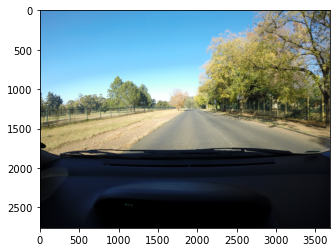

In [29]:
plt.imshow(plt.imread("C:/Users/Bruker/crack/crack_detect2/test/non-cracked/G0016423.JPG"))

In [30]:
location= "C:/Users/Bruker/crack/crack_detect2/test/non-cracked/G0016423.JPG"
predictor(location)

1.0


'There is no crack'

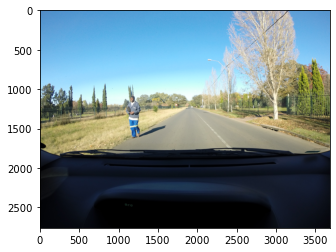

In [31]:
plt.imshow(plt.imread("C:/Users/Bruker/crack/crack_detect2/test/non-cracked/G0016387.JPG"))

In [32]:
location= "C:/Users/Bruker/crack/crack_detect2/test/non-cracked/G0016387.JPG"
predictor(location)

1.0


'There is no crack'

<font color=red>
Testing of Model Performance with crack Images from Test Data:

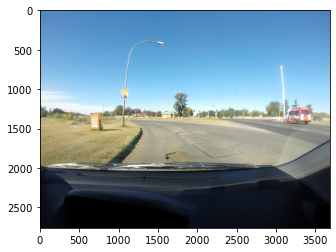

In [33]:
location= "C:/Users/Bruker/crack/crack_detect2/test/cracked/G0029784.JPG"
plt.imshow(plt.imread(location))

In [34]:
predictor(location)

0.0


'There is a crack'

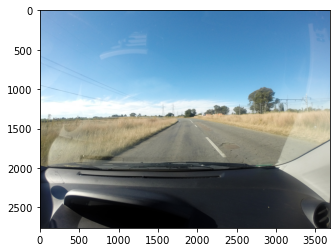

In [35]:
#Lets test another image:
location= "C:/Users/Bruker/crack/crack_detect2/test/cracked/G0041941.JPG"
plt.imshow(plt.imread(location))

In [36]:
predictor(location) 

0.0


'There is a crack'

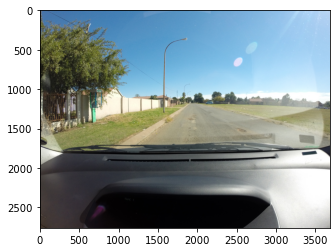

In [42]:
#Lets test another image:
location= "C:/Users/Bruker/crack/crack_detect2/test/cracked/G0066932.JPG"
plt.imshow(plt.imread(location))

In [43]:
predictor(location)

4.1320763e-25


'There is a crack'

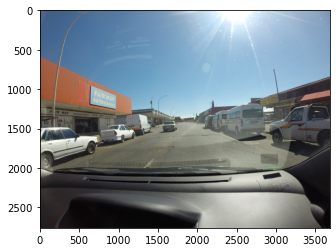

In [45]:
#Lets test another image:
location= "C:/Users/Bruker/crack/crack_detect2/test/cracked/G0094423.JPG"
plt.imshow(plt.imread(location))

In [46]:
predictor(location)

0.0


'There is a crack'

# PART IV: SAVING THE MODEL 

In [47]:
# save model and architecture to single file
cnn.save("model2.h5")
print("Saved model to disk")

Saved model to disk


# Reload Saved Model and Make a Prediction:

In [13]:
from tensorflow.keras.models import load_model
model = load_model('model2.h5')
# summarize model.
model.summary()
# load dataset

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3

In [26]:
def predictor2(location):
    test_image=image.load_img(location,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    #training_set.class_indices
    if result[0][0] == 1:
        
        prediction = "There is no crack"
    else:
        prediction = "There is a crack"
    return prediction

Text(1, 1, 'There is no crack')

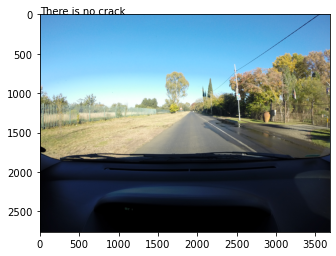

In [36]:
#Lets test of the reloaded model with non-crack images:
location= "C:/Users/Bruker/crack/project_group11/crack_detect2/test/non-cracked/G0016303.JPG"
plt.imshow(plt.imread(location))
plt.text(1, 1,predictor2(location))

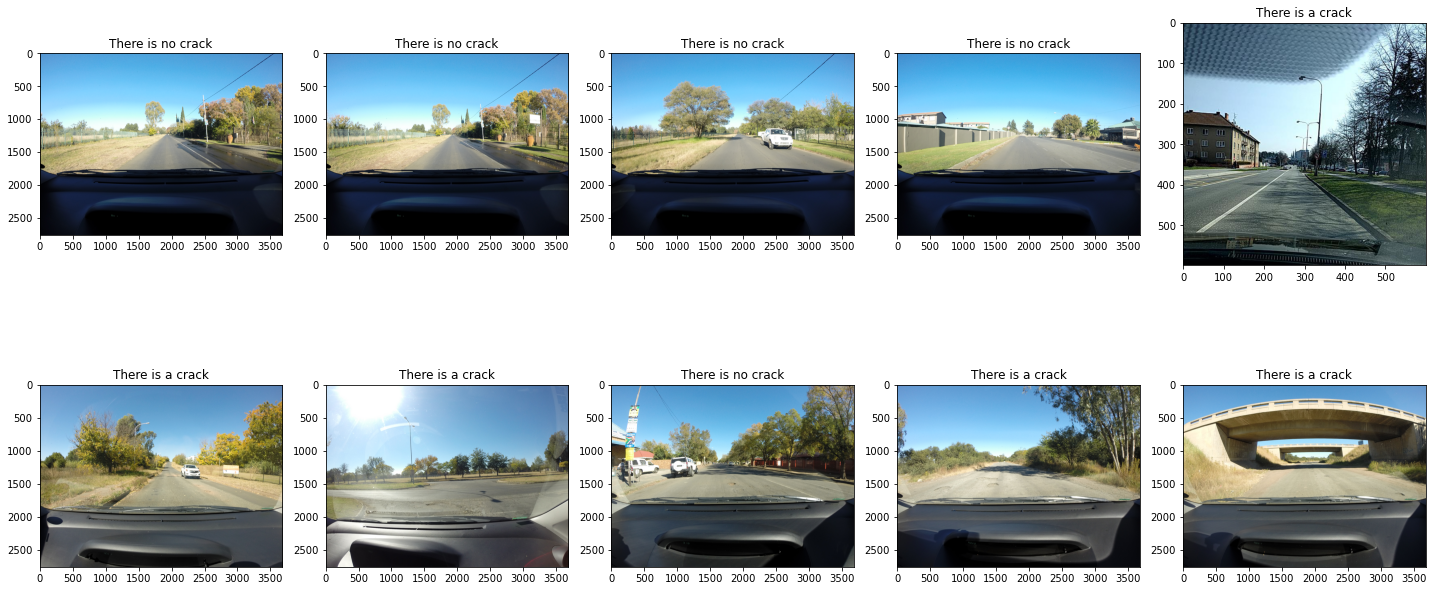

In [58]:
import PIL
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
lst = ["C:/Users/Bruker/crack/project_group11/crack_detect2/test/non-cracked/G0016303.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/non-cracked/G0016302.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/non-cracked/G0016397.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/non-cracked/G0016523.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/non-cracked/Czech_000075.jpg",
       "C:/Users/Bruker/crack/project_group11/crack_detect2/test/cracked/G0011524.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/cracked/G0028495.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/cracked/G0052166.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/cracked/G0064420.JPG",
      "C:/Users/Bruker/crack/project_group11/crack_detect2/test/cracked/G0064590.JPG"]

axs[0][0].title.set_text(predictor2(lst[0]))
axs[0][0].imshow(PIL.Image.open(lst[0]))
axs[0][1].title.set_text(predictor2(lst[1]))
axs[0][1].imshow(PIL.Image.open(lst[1])) 
axs[0][2].title.set_text(predictor2(lst[2]))
axs[0][2].imshow(PIL.Image.open(lst[2]))  
axs[0][3].title.set_text(predictor2(lst[3]))
axs[0][3].imshow(PIL.Image.open(lst[3]))  
axs[0][4].title.set_text(predictor2(lst[4]))
axs[0][4].imshow(PIL.Image.open(lst[4]))    
axs[1][0].title.set_text(predictor2(lst[5]))
axs[1][0].imshow(PIL.Image.open(lst[5]))   
axs[1][1].title.set_text(predictor2(lst[6]))
axs[1][1].imshow(PIL.Image.open(lst[6]))  
axs[1][2].title.set_text(predictor2(lst[7]))
axs[1][2].imshow(PIL.Image.open(lst[7])) 
axs[1][3].title.set_text(predictor2(lst[8]))
axs[1][3].imshow(PIL.Image.open(lst[8]))  
axs[1][4].title.set_text(predictor2(lst[9]))
axs[1][4].imshow(PIL.Image.open(lst[9]))

fig.tight_layout()

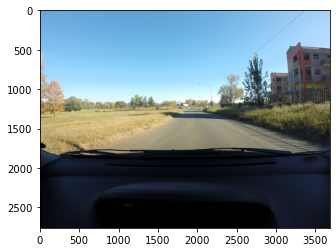

In [52]:
#Lets test another non-crack image:
location= "C:/Users/Bruker/crack/crack_detect2/test/non-cracked/G0016169.JPG"
plt.imshow(plt.imread(location))

In [53]:
predictor2(location)  # even though there are shadows and building along the way, the model predict correctly

1.0


'There is no crack'

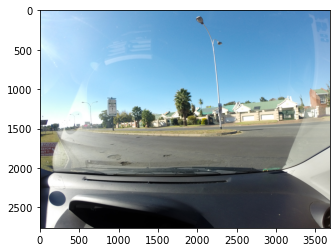

In [55]:
#Lets test the reloaded model with the crack images from test data
location= "C:/Users/Bruker/crack/crack_detect2/test/cracked/G0024751.JPG"
plt.imshow(plt.imread(location))


In [56]:
predictor2(location) #the image is taken from side, nonetheless model predicts correctly

0.0


'There is a crack'

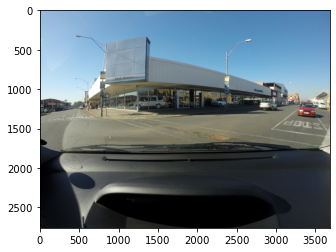

In [57]:
location= "C:/Users/Bruker/crack/crack_detect2/test/cracked/G0040983.JPG"
plt.imshow(plt.imread(location))


In [58]:
predictor2(location) 
#Even though there are a lot of distraction like big building, cars, traffic signs, the model predict correctly

0.0


'There is a crack'